In [ ]:
from IPython.display import clear_output
!pip install transformers
clear_output()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [ ]:
from transformers import pipeline
pretrained_name = "StevenLimcorn/indonesian-roberta-base-emotion-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)
nlp("Hal-hal baik akan datang.")

Downloading:   0%|          | 0.00/988 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/808k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'happy', 'score': 0.5701650977134705}]

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/Twitter_Emotion_Dataset.csv')
df.rename(columns={'label':'true_emotion'}, inplace=True)
columnsTitles = ['tweet', 'true_emotion']
df['true_emotion'] = df['true_emotion'].replace(['joy'],'happy')
df = df.reindex(columns=columnsTitles)
df = df[:200]
df

,tweet,true_emotion
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",anger
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",anger
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,happy
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",anger
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",happy
...,...,...
195,Ada cewe kena sexual harassment dan dia berani...,anger
196,"Orang #OldMoney dateng ke kandang, pakaiannya ...",happy
197,Gara2 [USERNAME] jadi googling berita ini. Tp ...,happy
198,Baru liat dan bener-bener dengerin secara seks...,love


In [ ]:
df["true_emotion"].value_counts()

anger      91
happy      40
sadness    39
fear       24
love        6
Name: true_emotion, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['true_emotion'] = le.fit_transform(df['true_emotion'])
df['true_emotion']

0      0
1      0
2      2
3      0
4      2
      ..
195    0
196    2
197    2
198    3
199    4
Name: true_emotion, Length: 200, dtype: int64

In [ ]:
df

,tweet,true_emotion
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",0
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",0
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,2
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",0
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",2
...,...,...
195,Ada cewe kena sexual harassment dan dia berani...,0
196,"Orang #OldMoney dateng ke kandang, pakaiannya ...",2
197,Gara2 [USERNAME] jadi googling berita ini. Tp ...,2
198,Baru liat dan bener-bener dengerin secara seks...,3


In [ ]:
tweet = df['tweet'][:200]
data = []

for i in tweet:
  data.append(nlp(i))

In [ ]:
predicted_label = []
confidence = []

for myList in data:
  for item in myList:
    predicted_label.append(item['label'])
    confidence.append(item['score'])

In [ ]:
df['predicted_emotion'] = le.fit_transform(predicted_label)

In [ ]:
confidence_percentage = []
for i in confidence:
  confidence_percentage.append(i * 100)

In [ ]:
df = df.assign(confidence=confidence_percentage)
df

,tweet,true_emotion,predicted_emotion,confidence
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",0,0,98.639524
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",0,0,88.938940
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,2,2,95.996565
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",0,0,63.016325
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",2,2,97.023553
...,...,...,...,...
195,Ada cewe kena sexual harassment dan dia berani...,0,0,98.401743
196,"Orang #OldMoney dateng ke kandang, pakaiannya ...",2,2,97.467631
197,Gara2 [USERNAME] jadi googling berita ini. Tp ...,2,2,96.158499
198,Baru liat dan bener-bener dengerin secara seks...,3,2,35.069689


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_true = le.fit_transform(df['true_emotion'])
y_pred = le.fit_transform(df['predicted_emotion'])

In [ ]:
matrix = classification_report(y_true, y_pred, labels=[0,1,2,3,4])
print('Classification report : \n\n',matrix)

Classification report : 

               precision    recall  f1-score   support

           0       0.94      0.93      0.94        91
           1       0.85      0.71      0.77        24
           2       0.88      0.95      0.92        40
           3       1.00      0.67      0.80         6
           4       0.81      0.90      0.85        39

    accuracy                           0.90       200
   macro avg       0.90      0.83      0.86       200
weighted avg       0.90      0.90      0.89       200



In [ ]:
matrix = classification_report(y_true, y_pred, labels=[0,1,2,3,4], output_dict=True)

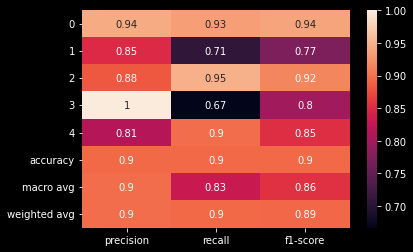

In [ ]:
matrix_df = pd.DataFrame(matrix)
sns.heatmap(pd.DataFrame(matrix_df).iloc[:-1, :].T, annot=True)

In [ ]:
df["true_emotion"].value_counts()

0    91
2    40
4    39
1    24
3     6
Name: true_emotion, dtype: int64

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_true, y_pred)),
                                   ('anger', 'happy', "love", "sadness", "fear"),
                                   ('anger', 'happy', "love", "sadness", "fear"))

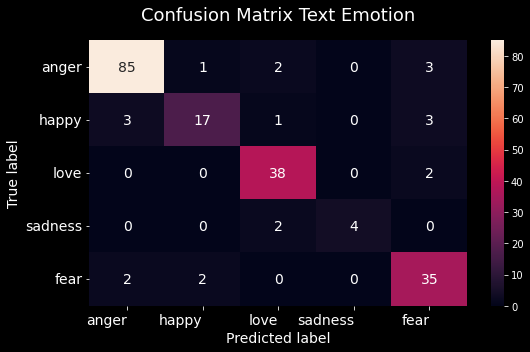

In [ ]:
import seaborn as sns
sns.color_palette("rocket", as_cmap=True)

plt.figure(figsize=(8,5))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Text Emotion', fontsize=18, pad=20)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df

,tweet,true_emotion,predicted_emotion,confidence
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",0,0,98.639524
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",0,0,88.938940
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,2,2,95.996565
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",0,0,63.016325
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",2,2,97.023553
...,...,...,...,...
195,Ada cewe kena sexual harassment dan dia berani...,0,0,98.401743
196,"Orang #OldMoney dateng ke kandang, pakaiannya ...",2,2,97.467631
197,Gara2 [USERNAME] jadi googling berita ini. Tp ...,2,2,96.158499
198,Baru liat dan bener-bener dengerin secara seks...,3,2,35.069689


In [ ]:
processed = [{'label': 'happy', 'score': 0.5701655745506287}]

In [ ]:
print(processed[0].get("label"))

happy


In [ ]:
print(processed[0].get("score"))

0.5701655745506287
